In [5]:
import numpy as np
import pandas as pd 
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [6]:
batch_size = 64
n_epochs = 10
lr = 0.02
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [7]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))

               ])),

    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),

    batch_size=batch_size, shuffle=True)



In [8]:
print(len(train_loader.dataset)) 
print(len(train_loader)) 
print(len(test_loader.dataset))

60000
938
10000


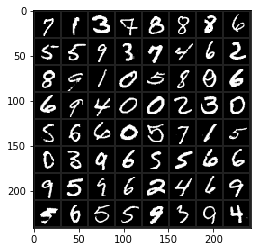

tensor(7) tensor(1) tensor(3) tensor(7)
torch.Size([64, 1, 28, 28])


In [9]:
def imshow(img):
    img = img * 0.3081 + 0.1307
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % labels[j] for j in range(4)))
print(images.size())

In [58]:
labels[0]

tensor(9)

In [10]:
class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        output = F.log_softmax(x, dim=1)

        return output
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = Net()

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
loss_f = nn.CrossEntropyLoss(reduction = 'mean')

In [13]:
def train(train_loader, model, optimizer, log_interval, epoch, criterion):
    model.train()
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == (log_interval-1):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(test_loader, model, criterion):
    model.eval() 
    test_loss = 0 
    correct = 0 
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, labels).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()
    
    test_loss /= len(test_loader) 
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [14]:
epochs = 5 
log_interval = 200 
criterion = loss_f

for epoch in range(1, epochs + 1):
    train(train_loader, model, optimizer, log_interval, epoch, criterion)
    test(test_loader, model, criterion)

Train Epoch: 1 [12736/60000 (21%)]	Loss: 0.112178
Train Epoch: 1 [25536/60000 (43%)]	Loss: 0.228457
Train Epoch: 1 [38336/60000 (64%)]	Loss: 0.039103
Train Epoch: 1 [51136/60000 (85%)]	Loss: 0.040475

Test set: Average loss: 0.0568, Accuracy: 9812/10000 (98%)

Train Epoch: 2 [12736/60000 (21%)]	Loss: 0.067292
Train Epoch: 2 [25536/60000 (43%)]	Loss: 0.030761
Train Epoch: 2 [38336/60000 (64%)]	Loss: 0.166656
Train Epoch: 2 [51136/60000 (85%)]	Loss: 0.166511

Test set: Average loss: 0.0494, Accuracy: 9843/10000 (98%)

Train Epoch: 3 [12736/60000 (21%)]	Loss: 0.047567
Train Epoch: 3 [25536/60000 (43%)]	Loss: 0.073727
Train Epoch: 3 [38336/60000 (64%)]	Loss: 0.026109
Train Epoch: 3 [51136/60000 (85%)]	Loss: 0.010719

Test set: Average loss: 0.0641, Accuracy: 9811/10000 (98%)

Train Epoch: 4 [12736/60000 (21%)]	Loss: 0.155995
Train Epoch: 4 [25536/60000 (43%)]	Loss: 0.018546
Train Epoch: 4 [38336/60000 (64%)]	Loss: 0.090118
Train Epoch: 4 [51136/60000 (85%)]	Loss: 0.046284

Test set: Averag

In [ ]:
epochs = 1
log_interval = 200 
criterion = loss_f

for epoch in range(1, epochs + 1):
    train(train_loader, model, optimizer, log_interval, epoch, criterion)
    test(test_loader, model, criterion)

### probando la red

(28, 28)
(1, 28, 28)
tensor([8])


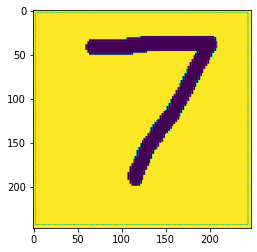

In [86]:
import cv2 as cv


image = cv.imread("angles.png")
bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(bw)
bw = cv.resize(bw,(28, 28))
print(bw.shape)

img = np.reshape(bw, (1, 28,28))
print(img.shape)
img = torch.from_numpy(img)
img = img.view(-1, 1, 28, 28).float()
outputs = model(img)
torch.max( outputs ,1)[1]
print(torch.max( outputs ,1)[1])
#loss = criterion(outputs, labels)


(28, 28)
(1, 28, 28)
tensor([3])


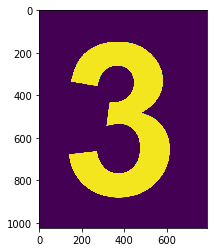

In [83]:
image = cv.imread("prueba.jpg")
bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
bw = cv.bitwise_not(bw)
plt.imshow(bw)
bw = cv.resize(bw,(28, 28))

print(bw.shape)

img = np.reshape(bw, (1, 28,28))
print(img.shape)
img = torch.from_numpy(img)
img = img.view(-1, 1, 28, 28).float()
output = model(img)
#print(torch.max( output ,1)[1])
_, y_pred = torch.max(output, dim=1)
print(y_pred)
#loss = criterion(outputs, labels)

(28, 28)
(1, 28, 28)
5


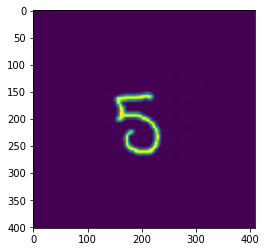

In [93]:
image = cv.imread("prueba2.png")
bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
bw = cv.bitwise_not(bw)
plt.imshow(bw)
bw = cv.resize(bw,(28, 28))

print(bw.shape)

img = np.reshape(bw, (1, 28,28))
print(img.shape)
img = torch.from_numpy(img)
img = img.view(-1, 1, 28, 28).float()
output = model(img)
#print(torch.max( output ,1)[1])
_, y_pred = torch.max(output, dim=1)
y_pred = y_pred.numpy()
print(y_pred[0])
#loss = criterion(outputs, labels)

In [4]:
image = cv.imread("sofwinres.png")
bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
bw = cv.bitwise_not(bw)
plt.imshow(bw)
bw = cv.resize(bw,(28, 28))

print(bw.shape)

img = np.reshape(bw, (1, 28,28))
print(img.shape)
img = torch.from_numpy(img)
img = img.view(-1, 1, 28, 28).float()
output = model(img)
#print(torch.max( output ,1)[1])
_, y_pred = torch.max(output, dim=1)
y_pred = y_pred.numpy()
print(y_pred[0])
#loss = criterion(outputs, labels)

NameError: name 'cv' is not defined